Install dependencies

In [2]:
!source venv/bin/activate
!pip install kaggle
!pip install pandas
!pip install numpy
!pip install matplotlib

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()

dataset_path = 'datasets/datamunge/sign-language-mnist'
api.dataset_download_files("datamunge/sign-language-mnist", path=dataset_path, unzip=True)
print("Dataset has been downloaded into ", dataset_path)

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
Dataset has been downloaded into  datasets/datamunge/sign-language-mnist


In [4]:
import pandas as pd
import numpy as np


train = pd.read_csv(f'{dataset_path}/sign_mnist_train.csv')
test = pd.read_csv(f'{dataset_path}/sign_mnist_test.csv')

train_data = np.array(train, dtype = 'float32') # todo: change type to int
test_data = np.array(test, dtype='float32') # todo: change type to int

numeric_labels = list(range(26))
numeric_to_alpha_label_map = {numeric_label: chr(65 + numeric_label) for numeric_label in numeric_labels}

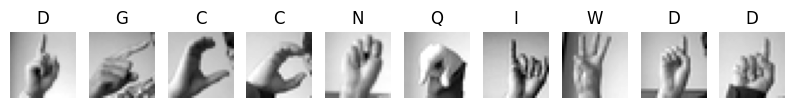

In [5]:
import math
import matplotlib.pyplot as plot

# plot the first 10 images
number_imags_to_plot = 10
img_size = 10
fig, axes = plot.subplots(1, number_imags_to_plot, figsize=(img_size, img_size))
for i, ax in enumerate(axes):
    numeric_label, *img_1d = train_data[i]
    img_1d = np.array(img_1d)
    img_pixel_count = img_1d.shape[0]
    edge_size = int(math.sqrt(img_pixel_count))
    ax.imshow(img_1d.reshape((edge_size, edge_size)), cmap='gray')
    alpha_label = numeric_to_alpha_label_map[numeric_label]
    ax.set_title(alpha_label)
    ax.axis('off')


train.shape: (27455, 785)
test.shape: (7172, 785)


Text(0.5, 1.0, 'Label')

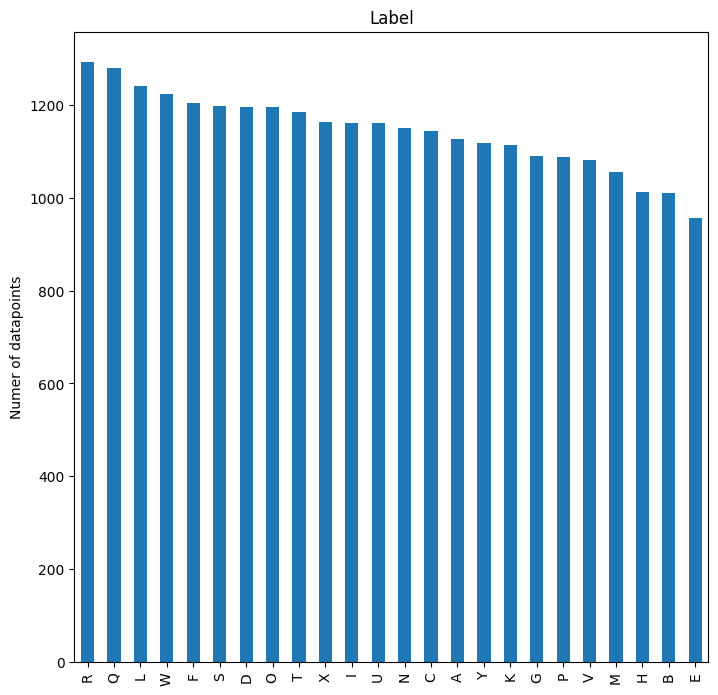

In [7]:
print(f"train.shape: {train.shape}")
print(f"test.shape: {test.shape}")

# Show distribution of train data
distribution = train['label'].value_counts(sort=True)
distribution.index = [ numeric_to_alpha_label_map[x] for x in distribution.index]
fig = plot.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
distribution.plot(kind='bar', ax=ax1)
ax1.set_ylabel('Numer of datapoints')
ax1.set_title('Label')